# Singaporean Food in Indonesia Phrase I : Greater Jakarta Area

Singaporean Food in Indonesia is a project inspired by a Singaporean content creator whom looking for Singaporean restaurant in Indonesia. For this notebook I'll show you list of Singaporean restaurant in Jakarta, located in various city like Jakarta itself, Tangerang, Bogor, and Bekasi. Here is the list curated from Google Maps and various platform website. This time I'll be using Zomato for the source.

Originally there are 101 restaurants selected all around Indonesia, which 39 of them are located in Jakarta. Note that the list here is not always the authentic one. There are coffee shop named Kopitiam and Chinese restaurant which has Singaporean food but never claimed themselves as Singaporean restaurant. At least they got kaya toast, hainanse rice, laksa, chili crab and etc, will explain more on menu.

# Content
* Overview
* Menu
* Facility
* Rating

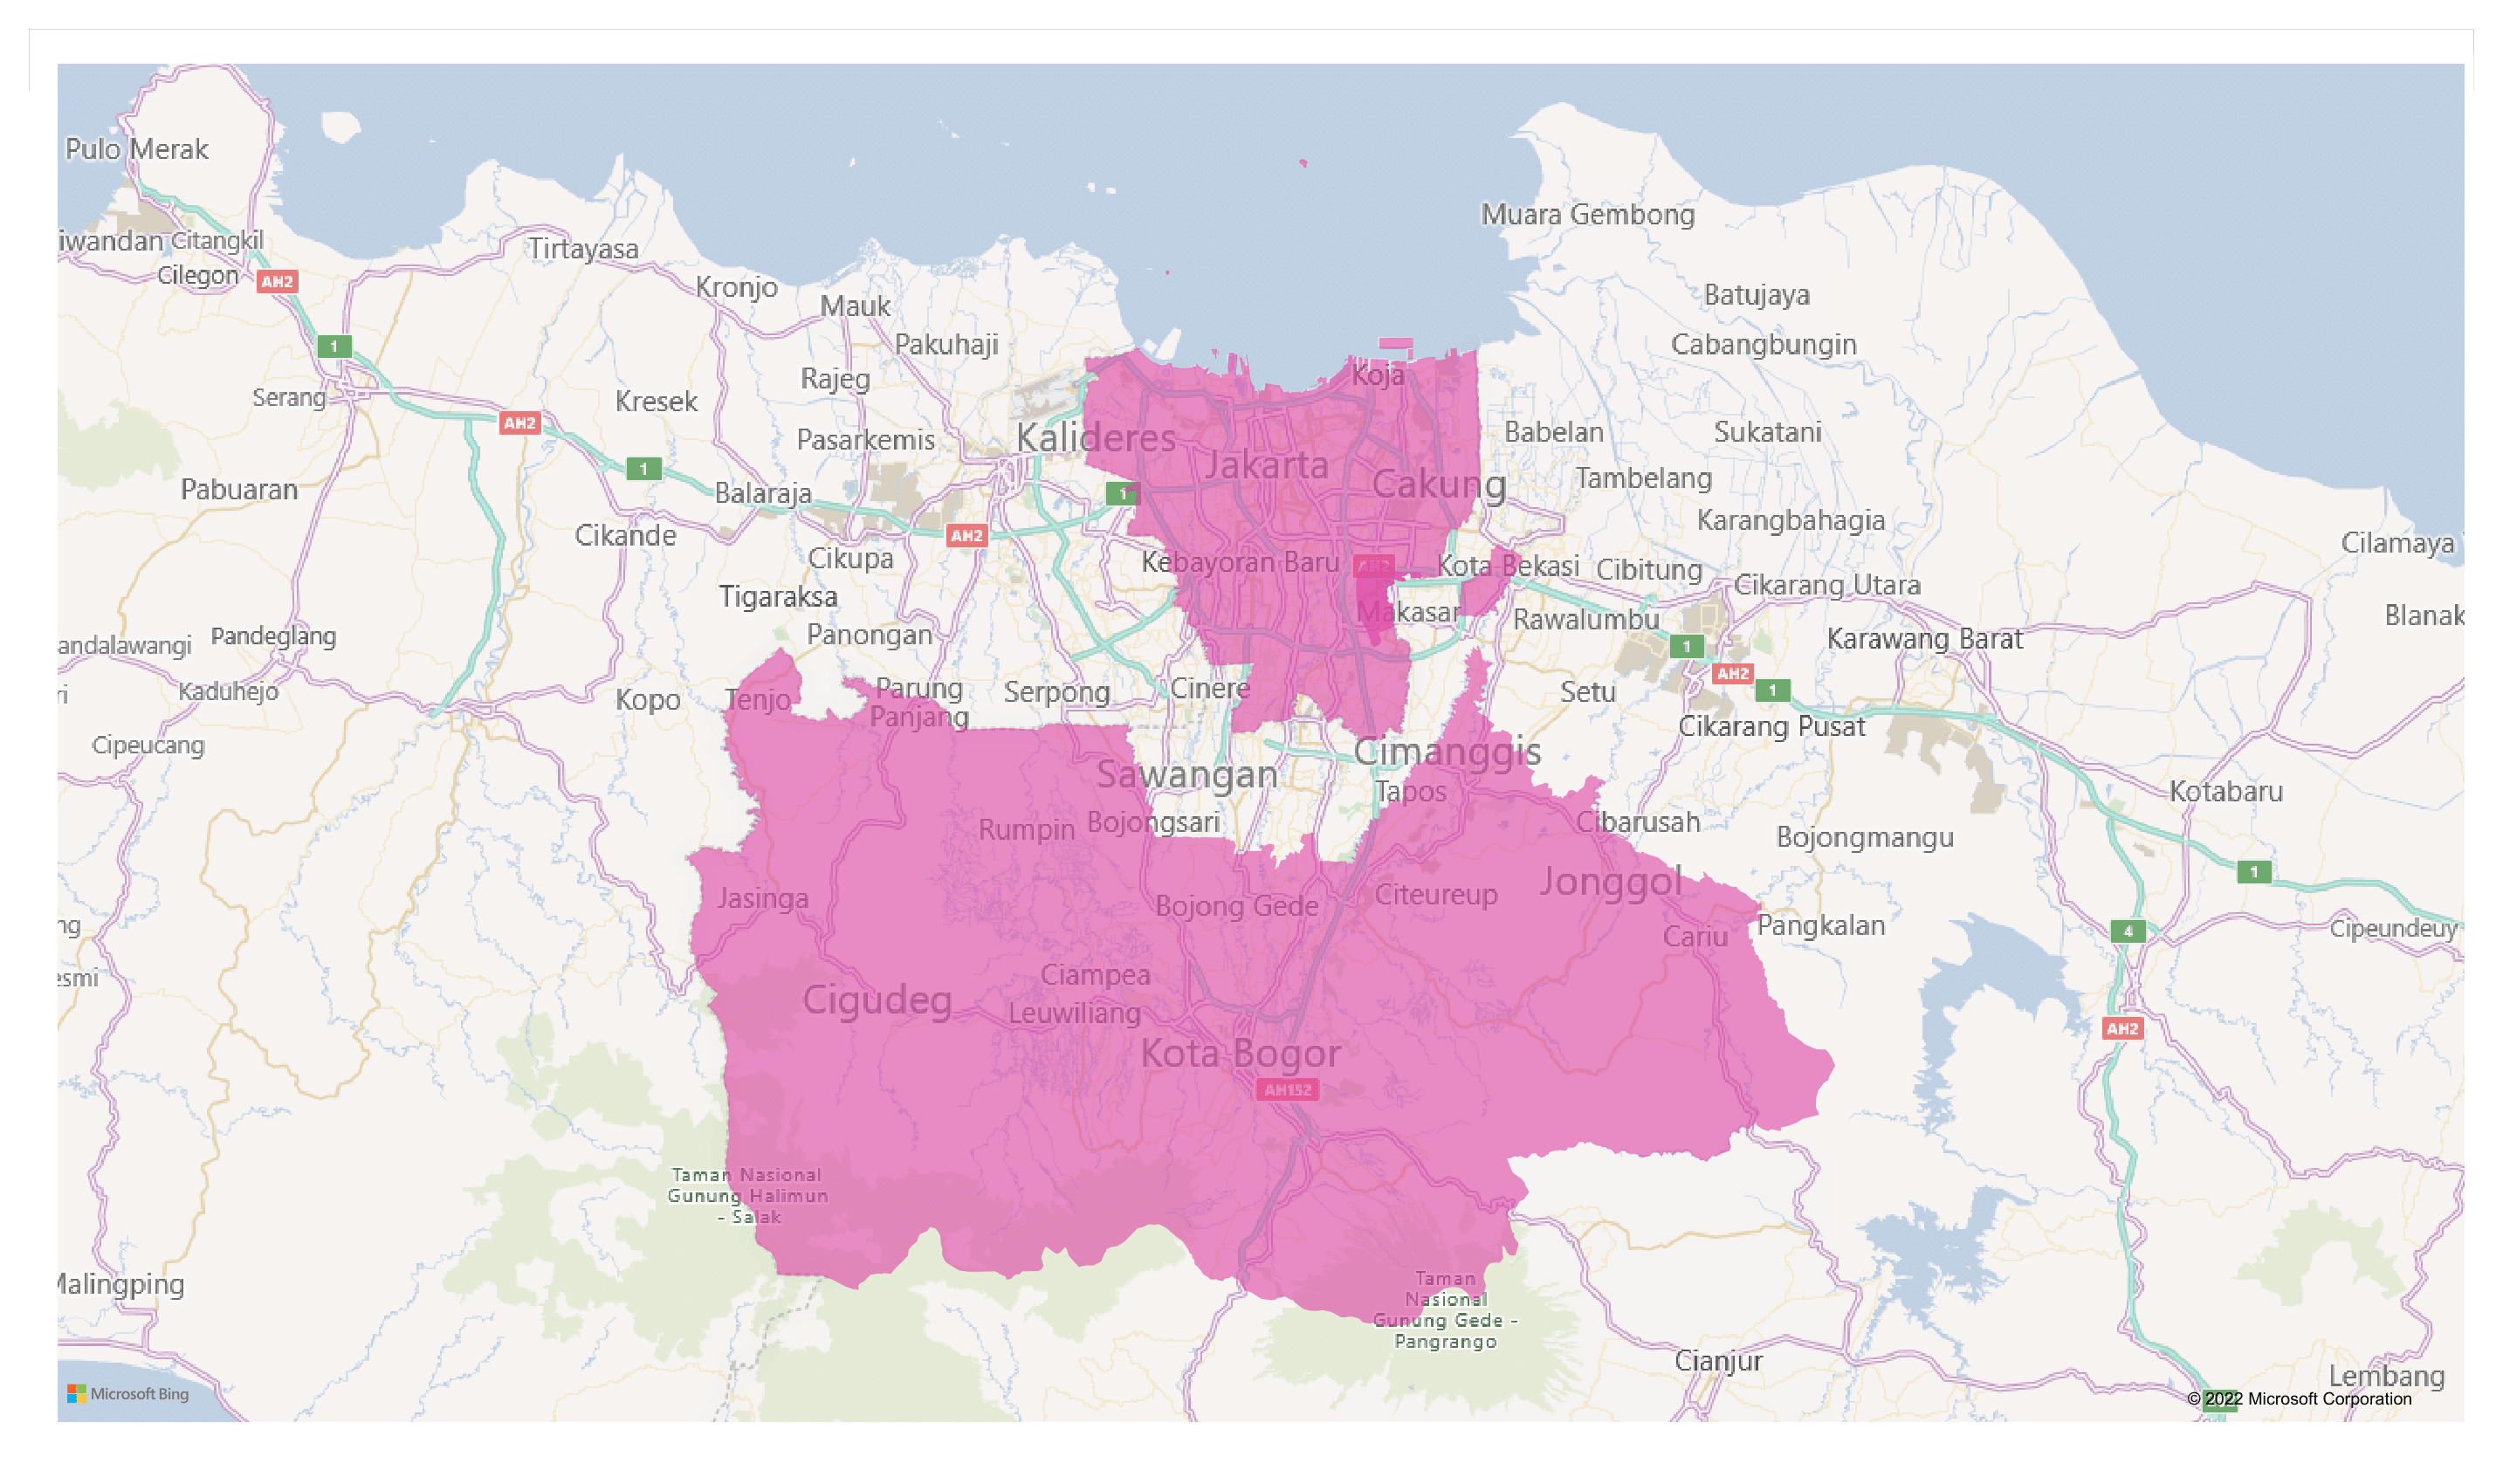

In [21]:
from pandasql import sqldf
import pandas as pd
singapore = pd.read_csv("../input/singapore-food/singapore_id.csv", sep = ";")

# Overview

Here is the list of all restaurants sorted by region and city, there are also their unique menu, price, and ratings. Mostly ranged from 40k until 50k rupiah and ratings mostly more than 4.5. Unique menu selected randomly by myself which represented the restaurant.

In [3]:
singapore = sqldf("""SELECT no, restaurant_name, region, city, unique_menu, price, 
                            ltrim(google_rating) as google_rating, 
                            ltrim(platform_rating) as platform_rating 
                     FROM singapore 
                     WHERE region = 'DKI Jakarta' OR 
                           city = 'Bekasi' OR 
                           city = 'Tangerang' OR 
                           city = 'Bogor'""")
singapore.style.hide_index()

# Menu

Singapore is famous for their Laksa as also most mentioned here in this list. Besides, they are also famous for their toast-- kaya toast especially, and hainanse rice. Their noodles are their most mainstream here as their food is kind of fusion with Chinese cuisine, like mee goreng, wonton noodle, and kway teow. Curry noodle and bakuteh are underrated but that's the real signature here. Not to mention their seafood is also well known-- chili crab for example.

I'll divide those menu on three category, which is Rice & Noodle Menu, Poultry Menu, and Toast & Snack Menu.

**Rice & Noodle**

Here is their rice and noodle menu. For the rice they mostly have hainanse rice, fried rice, and nasi lemak. Plate rice is rice with side dish on a plate-- it could be anything. They also have porridge as well. For noodle they mostly have laksa, mee goreng, curry noodle, and wonton noodle. There are also mee shua, mee siam, ifumie (crispy noodle), chop noodle, hokkien mee, and noodle soup. All the list are representative for each city so for the complete list you need to check the issue. 

**Bangi Kopitiam Restaurants** are the most serving rice and noodle menu. **Penang Bistro (Central Jakarta) and Tjap Toean (Tangerang)** has the most various noodle menu, meanwhile **Singaporean Hainanse Chicken Restaurants** and **Jia Jia Grand Indonesia (Central Jakarta)** has the most various rice menu. **Wee Nam Kee Pacific Place (Central Jakarta)** has their fragance rice.

There are several places doesn't serve rice, which are **Old Chang Kee Gandaria City**--only Singaporean style meatball street food, **Xi De Li**-- dessert streetfood only, and **Warung Mie Laksa 828**-- only Laksa noodle for takeaway**. Also there are some places doesn't have noodle on their menu, which are **Wancan Golden Plaza (South Jakarta), Salty Sam Mall of Indonesia (North Jakarta)**--chicken egg ricebowl only, **Old Chang Kee Gandaria City, Xi De Li,** and **Ngohiang Khas Bogor.**

For disambiguation (next time you look for the menu), mee is mie/noodle, fried rice is nasi goreng, kway teow is kwetiaw, beehoon is bihun, and hainanse rice is nasi hainam. Bakmi ayam is quite similar with wonton noodle but it's different after all.

In [6]:
singapore  = sqldf("""SELECT restaurant_name, city, rice_menu, noodle, noodle_specific
                      FROM singapore
                      WHERE region = 'DKI Jakarta' OR 
                            city = 'Bekasi' OR 
                            city = 'Tangerang' OR 
                            city = 'Bogor'
                      GROUP BY city""")
singapore.style.hide_index()

**Poultry Menu**

Here is all the meat menu, mostly chicken. I wrote the cooking method and sauce for chicken, mostly fried and the sauce is mainly dominated by sweet sour and kungpau, longed with blackpapper and teriyaki.

The seafood are usually on high end or family restaurant, mostly crab, prawn, and fish. There are several places which serving pork and duck menu. For plant based they also have tofu and vegatables menu. Output labeled 'yes' means that they have those menu but just as a topping/out of the menu, except pork for dietary restrictions.

Speaking about pork, there is a menu named bakuteh, one of the Singaporean delicates. Restaurant serving this is **Legend Kitchen (Muara Karang, North Jakarta City)**. For the chili crab you can find it at **Penang Bistro (Central Jakarta) and PUTIEN PIK (North Jakarta).**

In [8]:
singapore  = sqldf("""SELECT restaurant_name, city, chicken, seafood, poultry_other
                      FROM singapore
                      WHERE region = 'DKI Jakarta' OR 
                            city = 'Bekasi' OR 
                            city = 'Tangerang' OR 
                            city = 'Bogor'
                      GROUP BY city""")
singapore.style.hide_index()

**Toast & Snack Menu**

Toast is also one of Singaporean delicacy --for exact is kaya which most mentioned here. The other popular toast menu are peanut, butter, chocolate, and cheese. If you visit **Bangi Kopitiam Restaurants**, there is a distinct menu which is melaka portugese toast, the toast is kind of chocolatey things. Like this one.

Snack dish is the other light (or could be appetizer) menu on the list available. There are dimsum (shumai, hakau, mantau, cakwe etc), spring roll, banana fritter, fries (french fries, cassava) and many more. **Bubur Singapore** in Bekasi has complete singaporean meatball and tempura. **Lau Liem Mee Pok (North Jakarta)** has the most snack dishes including dimsum and curry puff. **Lemongrass Resto (Bogor)** also has various selection of snack including dimsum, chee chong fun, and onde keju.

In this section, toast and snack are listed separately.

In [15]:
singapore  = sqldf("""SELECT restaurant_name, city, toast
                      FROM singapore
                      WHERE (region = 'DKI Jakarta' OR 
                             city = 'Bekasi' OR 
                             city = 'Tangerang' OR 
                             city = 'Bogor') 
                        AND (toast NOT LIKE '%no')""")
singapore.style.hide_index()

In [17]:
singapore  = sqldf("""SELECT restaurant_name, city, snack_dish
                      FROM singapore
                      WHERE (region = 'DKI Jakarta' OR 
                             city = 'Bekasi' OR 
                             city = 'Tangerang' OR 
                             city = 'Bogor') 
                        AND (snack_dish NOT LIKE '%no')""")
singapore.style.hide_index()

# Facility

All restaurants are providing their takeaway options, meanwhile only half of them has delivery options. Outdoor and smoking area are almost rare, only **Bangi Kopitiam Pasar Minggu** has both of them. Beer is the most available options eventhough alcohol drinks are rarely served in this area. And wifi is ravedly available. 

Grouped by city.

In [20]:
singapore  = sqldf("""SELECT restaurant_name, city, takeaway, delivery, outdoor_seat, 
                             smoking_area, alcohol_served, wifi
                      FROM singapore
                      WHERE region = 'DKI Jakarta' OR 
                              city = 'Bekasi' OR 
                              city = 'Tangerang' OR 
                              city = 'Bogor'
                      GROUP BY city""")
singapore.style.hide_index()

# Rating

These ratings are ordered by highest total rating, should they have more than 3.5 then the restaurant is worth to try. All the facility and menu are representated by all both google and platform rating and count, so in the meantime only ratings are counted here. Based on the results, **Warung Laksa 828 (Bogor), Penang Bistro (Central Jakarta)**, and **Legend Kitchen (North Jakarta)** are the top 3.

Breaking based on the area, here is the best restaurant among Jakarta, which are **Penang Bistro (Central Jakarta, scored 4,5), Legend Kitchen (North Jakarta, scored 4,45), Lau Mok Kopitiam (West Jakarta-- apparently the only one, scored 3,05), and Uncle K Cijantung Mall (East Jakarta, the only one, scored 3,35)**.

For Bekasi and Tangerang they have representatively Bangi Kopitiam Kemang Pratama (scored 3,65 from 835 vote) and Walao Eh (3,85). Warung Laksa 828 has the highest rating in this list as long as in Bogor, eventhough it's kind of takeaway-only places (scored 4.9).

NA labeled here are the restaurant who doesn't have another ratings besides of google/platform ratings.

In [22]:
singapore  = sqldf("""SELECT restaurant_name, city, 
                             ltrim(google_rating) as google_rating, 
                             ltrim(platform_rating) as platform_rating, 
                             ltrim((google_rating + platform_rating)/2) as total_rating,
                        CASE
                            WHEN (google_rating + platform_rating)/2 >= 3.5 THEN "Recommended"
                            ELSE "Reconsider"
                            END AS "Recommendation"
                        FROM singapore 
                        WHERE region = 'DKI Jakarta' OR 
                                city = 'Bekasi' OR 
                                city = 'Tangerang' OR 
                                city = 'Bogor'
                        ORDER BY total_rating DESC;""")
singapore.style.hide_index()